In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from src.ucb1 import UCB1
from src.environment import Environment
from src.thompson_sampling import ThompsonSampling

### Constants and hyperparameters

In [2]:
T = 1000 # number of rounds
n_arms = 4 # number of arms
n_experiments = 1000 # number of experiments
ts_rewards_per_experiment = [] # rewards of Thompson Sampling
ucb1_rewards_per_experiment = [] # rewards of UCB1

### Environment

In [3]:
# Initializing the environment
environment = Environment(n_arms=n_arms)

In [4]:
# Sampling the optimal arm from the environment
opt = environment.probabilities.max()

### Running the experiments

In [5]:
# Iterating over the experiments
for e in tqdm(range(n_experiments), desc="Simulating"):
    # Initializing the learners
    ts_learner = ThompsonSampling(n_arms=n_arms)
    ucb1 = UCB1(n_arms=n_arms)

    # Iterating over the steps
    for t in range(T):
        ### TS ###
        pulled_arm = ts_learner.pull_arm()
        reward = environment.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        ### UCB1 ###
        pulled_arm = ucb1.pull_arm()
        reward = environment.round(pulled_arm)
        ucb1.update(pulled_arm, reward)
    
    # Updating the rewards per experiment for each learner
    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    ucb1_rewards_per_experiment.append(ucb1.collected_rewards)

Simulating: 100%|██████████| 1000/1000 [00:18<00:00, 54.68it/s]


### Results

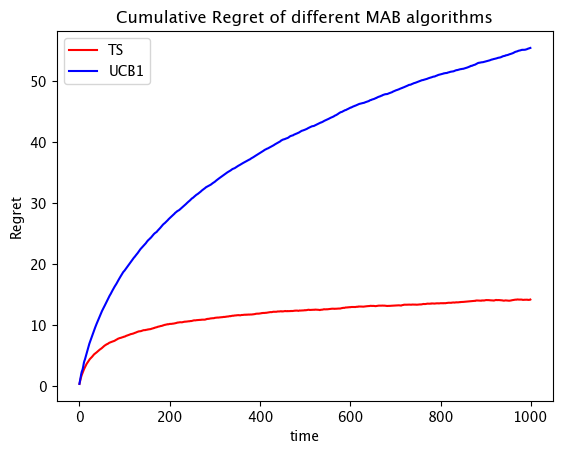

In [6]:
# Plotting the results
plt.figure(0)
plt.xlabel("time")
plt.ylabel("Regret")
plt.title("Cumulative Regret of different MAB algorithms")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - ucb1_rewards_per_experiment, axis=0)), 'b')
plt.legend(['TS', 'UCB1'])
plt.show()